# FitBit Fitness Tracker Analysis

# **Analyzing the Relationship Between Physical Activity and Sleep Quality: Identifying Patterns and Anomalies in Healthy Habits**

## **Introduction**

Physical activity and sleep are fundamental pillars of a healthy lifestyle. However, understanding how these factors interact and influence individual health remains a significant challenge in the field of health data science. This project aims to analyze how physical activity patterns impact sleep quality while identifying healthy behaviors and anomalies in the data.

Using a dataset based on Fitbit devices, which collects detailed information about steps, physical intensity, calories burned, heart rate, and more, this project will explore:

1. **The relationship between physical activity and sleep quality.**

2. **Temporal patterns of healthy habits.**

3. **Anomalies in physical behavior that may signal health risks or inconsistencies.**


## **Dataset**

The dataset includes data collected from 35 users over multiple days, with high temporal granularity (minute-by-minute and hour-by-hour information). Key metrics include:

- **Physical activity:** Steps, intensity, calories burned.

- **Health indicators:** Heart rate, distance traveled, active minutes.

- **Demographics:** Body weight, BMI, body fat percentage.


## **Project Objectives**

1. Explore general trends in physical activity, energy expenditure, and heart rate.

2. Identify temporal patterns associated with healthy habits, such as maintaining consistent activity or intensity levels.

3. Develop a model to predict calorie burn or intensity levels based on physical behavior.

4. Detect anomalies in the data that may indicate unusual events or atypical behavior.


In [251]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [252]:
df_dailyActivity = pd.read_csv('/Users/andreuolaortua/Desktop/code/Machine learning/00 - Projects/Project 19 - FitBit Fitness Tracker Analysis/External Data/Fitabase Data 3.12.16-4.11.16/dailyActivity_merged.csv')
df_heartrate = pd.read_csv('/Users/andreuolaortua/Desktop/code/Machine learning/00 - Projects/Project 19 - FitBit Fitness Tracker Analysis/External Data/Fitabase Data 3.12.16-4.11.16/heartrate_seconds_merged.csv')
df_hourlyCalories = pd.read_csv('/Users/andreuolaortua/Desktop/code/Machine learning/00 - Projects/Project 19 - FitBit Fitness Tracker Analysis/External Data/Fitabase Data 3.12.16-4.11.16/hourlyCalories_merged.csv')
df_hourlyIntensities = pd.read_csv('/Users/andreuolaortua/Desktop/code/Machine learning/00 - Projects/Project 19 - FitBit Fitness Tracker Analysis/External Data/Fitabase Data 3.12.16-4.11.16/hourlyIntensities_merged.csv')
df_hourlySteps = pd.read_csv('/Users/andreuolaortua/Desktop/code/Machine learning/00 - Projects/Project 19 - FitBit Fitness Tracker Analysis/External Data/Fitabase Data 3.12.16-4.11.16/hourlySteps_merged.csv')
df_minuteCaloriesNarrow = pd.read_csv('/Users/andreuolaortua/Desktop/code/Machine learning/00 - Projects/Project 19 - FitBit Fitness Tracker Analysis/External Data/Fitabase Data 3.12.16-4.11.16/minuteCaloriesNarrow_merged.csv')
df_minuteIntensitiesNarrow = pd.read_csv('/Users/andreuolaortua/Desktop/code/Machine learning/00 - Projects/Project 19 - FitBit Fitness Tracker Analysis/External Data/Fitabase Data 3.12.16-4.11.16/minuteIntensitiesNarrow_merged.csv')
df_minuteMETsNarrow = pd.read_csv('/Users/andreuolaortua/Desktop/code/Machine learning/00 - Projects/Project 19 - FitBit Fitness Tracker Analysis/External Data/Fitabase Data 3.12.16-4.11.16/minuteMETsNarrow_merged.csv')
df_minuteSleep = pd.read_csv('/Users/andreuolaortua/Desktop/code/Machine learning/00 - Projects/Project 19 - FitBit Fitness Tracker Analysis/External Data/Fitabase Data 3.12.16-4.11.16/minuteSleep_merged.csv')
df_minuteStepsNarrow = pd.read_csv('/Users/andreuolaortua/Desktop/code/Machine learning/00 - Projects/Project 19 - FitBit Fitness Tracker Analysis/External Data/Fitabase Data 3.12.16-4.11.16/minuteStepsNarrow_merged.csv')
df_weightLogInfo = pd.read_csv('/Users/andreuolaortua/Desktop/code/Machine learning/00 - Projects/Project 19 - FitBit Fitness Tracker Analysis/External Data/Fitabase Data 3.12.16-4.11.16/weightLogInfo_merged.csv')


In [253]:
datasets = [('df_dailyActivity', df_dailyActivity), 
            ('df_heartrate', df_heartrate), 
            ('df_hourlyCalories', df_hourlyCalories), 
            ('df_hourlyIntensities', df_hourlyIntensities), 
            ('df_hourlySteps', df_hourlySteps), 
            ('df_minuteCaloriesNarrow', df_minuteCaloriesNarrow), 
            ('df_minuteIntensitiesNarrow', df_minuteIntensitiesNarrow),
            ('df_minuteMETsNarrow', df_minuteMETsNarrow), 
            ('df_minuteSleep', df_minuteSleep), 
            ('df_minuteStepsNarrow', df_minuteStepsNarrow), 
            ('df_weightLogInfo', df_weightLogInfo)]
print(len(datasets))

11


In [254]:
for name, i in datasets:
    print(f"Dataset: {name}")
    print(i.columns)

Dataset: df_dailyActivity
Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')
Dataset: df_heartrate
Index(['Id', 'Time', 'Value'], dtype='object')
Dataset: df_hourlyCalories
Index(['Id', 'ActivityHour', 'Calories'], dtype='object')
Dataset: df_hourlyIntensities
Index(['Id', 'ActivityHour', 'TotalIntensity', 'AverageIntensity'], dtype='object')
Dataset: df_hourlySteps
Index(['Id', 'ActivityHour', 'StepTotal'], dtype='object')
Dataset: df_minuteCaloriesNarrow
Index(['Id', 'ActivityMinute', 'Calories'], dtype='object')
Dataset: df_minuteIntensitiesNarrow
Index(['Id', 'ActivityMinute', 'Intensity'], dtype='object')
Dataset: df_minuteMETsNarrow
Index(['Id', 'ActivityMinute', 'METs'], dtype=

All datasets have a column 'Id'.

In [255]:
for n, i in datasets:
    print(f"Id type of the {n} dataset: ",i['Id'].dtypes)

Id type of the df_dailyActivity dataset:  int64
Id type of the df_heartrate dataset:  int64
Id type of the df_hourlyCalories dataset:  int64
Id type of the df_hourlyIntensities dataset:  int64
Id type of the df_hourlySteps dataset:  int64
Id type of the df_minuteCaloriesNarrow dataset:  int64
Id type of the df_minuteIntensitiesNarrow dataset:  int64
Id type of the df_minuteMETsNarrow dataset:  int64
Id type of the df_minuteSleep dataset:  int64
Id type of the df_minuteStepsNarrow dataset:  int64
Id type of the df_weightLogInfo dataset:  int64


In [256]:
id_sets = [set(i[1]['Id']) for i in datasets]

df_dailyActivity_ids = set(df_dailyActivity['Id'])

for idx_set in id_sets:
    if idx_set.issubset(df_dailyActivity_ids):
        print("All IDs in df_dailyActivity dataset.")
    else:
        print("NOT all IDs in df_dailyActivity dataset.")

All IDs in df_dailyActivity dataset.
All IDs in df_dailyActivity dataset.
All IDs in df_dailyActivity dataset.
All IDs in df_dailyActivity dataset.
All IDs in df_dailyActivity dataset.
All IDs in df_dailyActivity dataset.
All IDs in df_dailyActivity dataset.
All IDs in df_dailyActivity dataset.
All IDs in df_dailyActivity dataset.
All IDs in df_dailyActivity dataset.
All IDs in df_dailyActivity dataset.


In [257]:
for n, i in datasets:
    if i.isnull().values.any() > 0:
        print(f"The {n} dataset have null values.\n", i.isnull().sum())
    else:
        print(f"No null values in {n} dataset.")

No null values in df_dailyActivity dataset.
No null values in df_heartrate dataset.
No null values in df_hourlyCalories dataset.
No null values in df_hourlyIntensities dataset.
No null values in df_hourlySteps dataset.
No null values in df_minuteCaloriesNarrow dataset.
No null values in df_minuteIntensitiesNarrow dataset.
No null values in df_minuteMETsNarrow dataset.
No null values in df_minuteSleep dataset.
No null values in df_minuteStepsNarrow dataset.
The df_weightLogInfo dataset have null values.
 Id                 0
Date               0
WeightKg           0
WeightPounds       0
Fat               31
BMI                0
IsManualReport     0
LogId              0
dtype: int64


We are going to delate the 'Fat' column since there are only two values.

In [258]:
df_weightLogInfo.drop(columns=['Fat'], axis=1, inplace=True)

In [259]:
df_weightLogInfo.head()

Id                  Date    WeightKg  WeightPounds        BMI  \
0  1503960366  4/5/2016 11:59:59 PM   53.299999    117.506384  22.969999   
1  1927972279  4/10/2016 6:33:26 PM  129.600006    285.719105  46.169998   
2  2347167796  4/3/2016 11:59:59 PM   63.400002    139.773078  24.770000   
3  2873212765  4/6/2016 11:59:59 PM   56.700001    125.002104  21.450001   
4  2873212765  4/7/2016 11:59:59 PM   57.200001    126.104416  21.650000   

   IsManualReport          LogId  
0            True  1459900799000  
1           False  1460313206000  
2            True  1459727999000  
3            True  1459987199000  
4            True  1460073599000

In [260]:
for n, i in datasets:
    if i.duplicated().values.any() > 0:
        print(f"The {n} dataset have duplicated values.\n", i.duplicated().sum())
    else:
        print(f"No duplicated values in {n} dataset.")

No duplicated values in df_dailyActivity dataset.
No duplicated values in df_heartrate dataset.
No duplicated values in df_hourlyCalories dataset.
No duplicated values in df_hourlyIntensities dataset.
No duplicated values in df_hourlySteps dataset.
No duplicated values in df_minuteCaloriesNarrow dataset.
No duplicated values in df_minuteIntensitiesNarrow dataset.
No duplicated values in df_minuteMETsNarrow dataset.
The df_minuteSleep dataset have duplicated values.
 525
No duplicated values in df_minuteStepsNarrow dataset.
No duplicated values in df_weightLogInfo dataset.


In [261]:
df_minuteSleep.shape

(198559, 4)

In [262]:
df_minuteSleep = df_minuteSleep.drop_duplicates()
df_minuteSleep.shape

(198034, 4)

In [263]:
df_dailyActivity.head(10)

Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366    3/25/2016       11004           7.11             7.11   
1  1503960366    3/26/2016       17609          11.55            11.55   
2  1503960366    3/27/2016       12736           8.53             8.53   
3  1503960366    3/28/2016       13231           8.93             8.93   
4  1503960366    3/29/2016       12041           7.85             7.85   
5  1503960366    3/30/2016       10970           7.16             7.16   
6  1503960366    3/31/2016       12256           7.86             7.86   
7  1503960366     4/1/2016       12262           7.87             7.87   
8  1503960366     4/2/2016       11248           7.25             7.25   
9  1503960366     4/3/2016       10016           6.37             6.37   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                2.57                      0.46   
1                       0.0                6.92                      0.73   
2                       0.0                4.66                      0.16   
3                       0.0                3.19                      0.79   
4                       0.0                2.16                      1.09   
5                       0.0                2.36                      0.51   
6                       0.0                2.29                      0.49   
7                       0.0                3.32                      0.83   
8                       0.0                3.00                      0.45   
9                       0.0                0.91                      1.28   

   LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0                 4.07                      0.0                 33   
1                 3.91                      0.0                 89   
2                 3.71                      0.0                 56   
3                 4.95                      0.0                 39   
4                 4.61                      0.0                 28   
5                 4.29                      0.0                 30   
6                 5.04                      0.0                 33   
7                 3.64                      0.0                 47   
8                 3.74                      0.0                 40   
9                 4.18                      0.0                 15   

   FairlyActiveMinutes  LightlyActiveMinutes  SedentaryMinutes  Calories  
0                   12                   205               804      1819  
1                   17                   274               588      2154  
2                    5                   268               605      1944  
3                   20                   224              1080      1932  
4                   28                   243               763      1886  
5                   13                   223              1174      1820  
6                   12                   239               820      1889  
7                   21                   200               866      1868  
8                   11                   244               636      1843  
9                   30                   314               655      1850

In [264]:
df_dailyActivity.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

/var/folders/7g/p7l3dxxd09g48svxxrg3b4880000gn/T/ipykernel_42695/2148674674.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/var/folders/7g/p7l3dxxd09g48svxxrg3b4880000gn/T/ipykernel_42695/2148674674.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/var/folders/7g/p7l3dxxd09g48svxxrg3b4880000gn/T/ipykernel_42695/2148674674.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/var/folders/7g/p7l3dxxd09g48svxxrg3b4880000gn/T/ipykernel_42695/2148674674.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a Fi

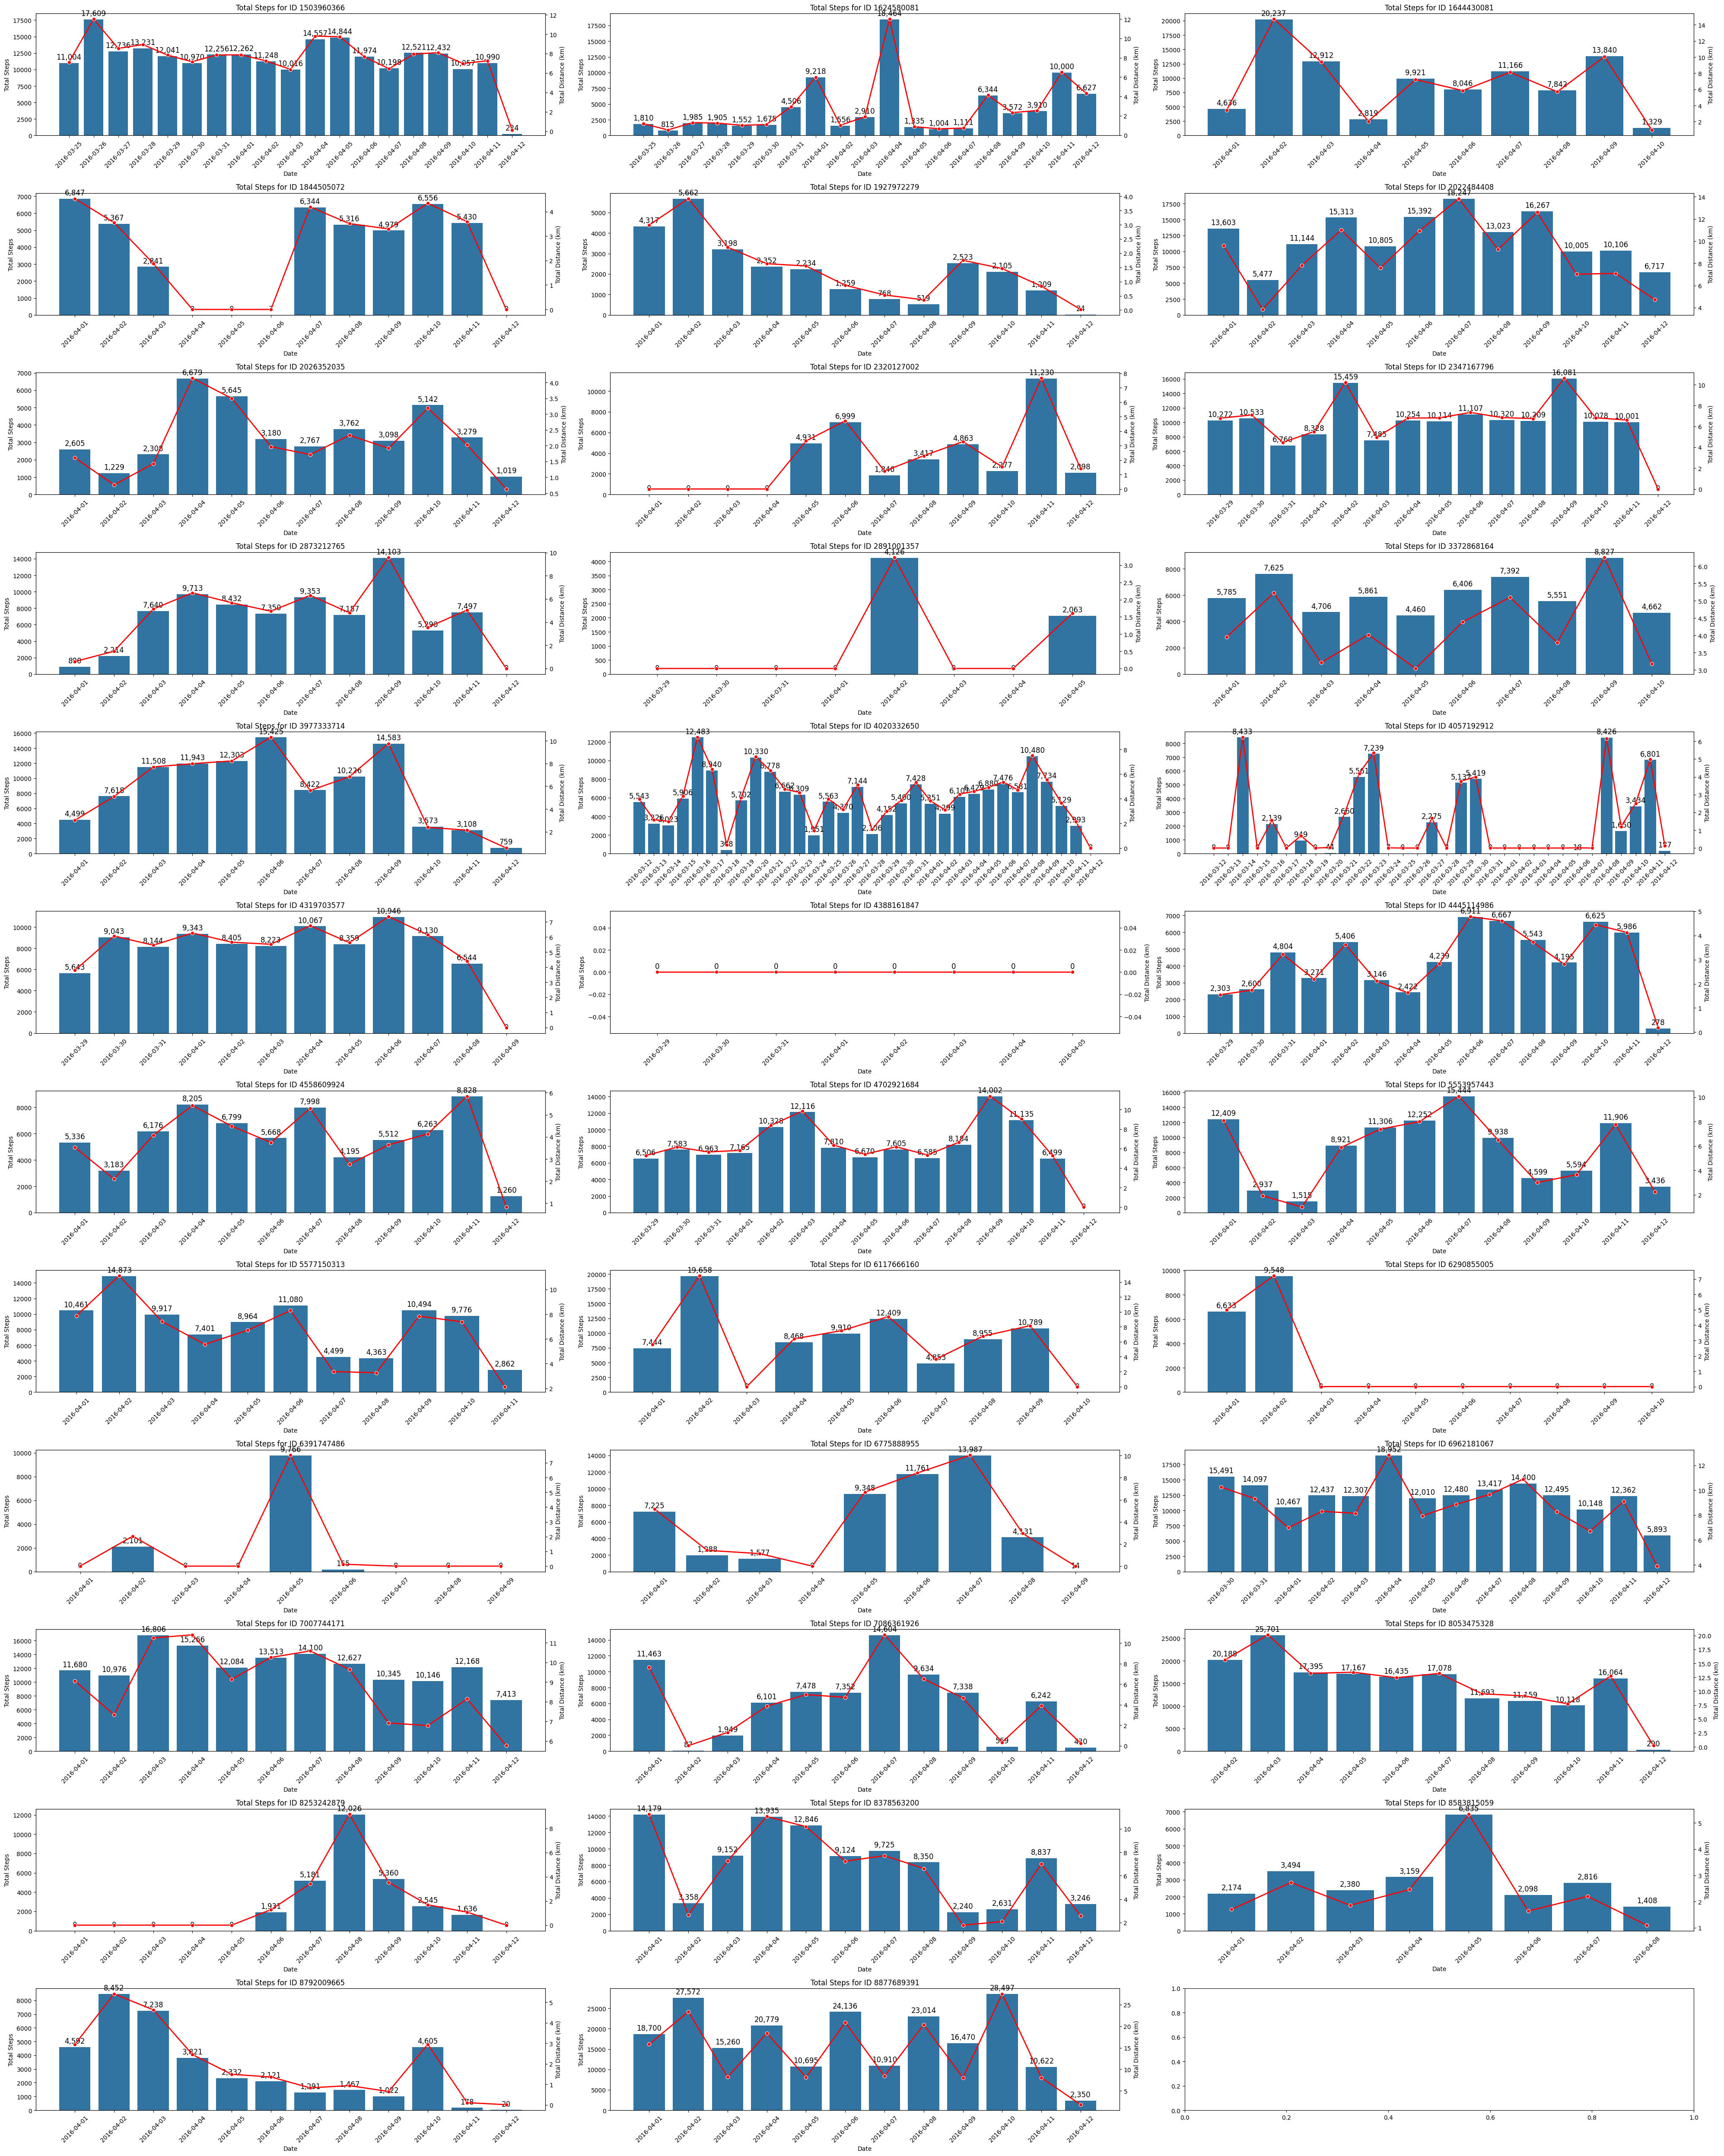

In [265]:
# Convert 'ActivityDate' in df_dailyActivity to datetime format, remove timezone info
df_dailyActivity['ActivityDate'] = pd.to_datetime(df_dailyActivity['ActivityDate']).dt.tz_localize(None)

# Convert 'ActivityDate' column to string format for plotting
df_dailyActivity['ActivityDate'] = df_dailyActivity['ActivityDate'].astype(str)

# Set the number of rows and columns for the subplots grid
n_rows = 12  
n_cols = 3  

# Create a figure with subplots (12 rows, 3 columns) with a large size
fig, axes = plt.subplots(n_rows, n_cols, figsize=(40, 50))

# Flatten the axes array to make it easier to iterate over
axes = axes.flatten()

# Loop through each 'Id' and corresponding filtered data from df_dailyActivity
for idx, (id_specific, df_filtered) in enumerate(df_dailyActivity.groupby('Id')):
    ax = axes[idx]  # Select the subplot for this ID
    
    # Create a barplot of 'TotalSteps' against 'ActivityDate'
    sns.barplot(x='ActivityDate', y='TotalSteps', data=df_filtered, ax=ax)
    
    # Annotate the bars with their respective heights (total steps)
    for p in ax.patches:
        ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), textcoords='offset points')
    
    # Create a second y-axis for the line plot (TotalDistance)
    ax2 = ax.twinx()
    
    # Create a lineplot of 'TotalDistance' against 'ActivityDate' with a red color
    sns.lineplot(x='ActivityDate', y='TotalDistance', data=df_filtered, ax=ax2, color='red', marker='o', linewidth=2)

    # Set the title of the subplot
    ax.set_title(f'Total Steps for ID {id_specific}')
    
    # Set labels for the x and y axes
    ax.set_xlabel('Date')
    ax.set_ylabel('Total Steps')
    
    # Set label for the secondary y-axis (Total Distance)
    ax2.set_ylabel('Total Distance (km)')
    
    # Rotate the x-axis labels for better readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Adjust the layout to prevent overlap of subplots
plt.tight_layout()

# Show the plot
plt.show()

In [266]:
df_minuteSleep.value.value_counts()

value
1    183038
2     12983
3      2013
Name: count, dtype: int64

In [267]:
df_minuteSleep['date'] = pd.to_datetime(df_minuteSleep['date'], errors='coerce')
df_filtered = df_minuteSleep[(df_minuteSleep['Id'] == 1503960366) & (df_minuteSleep['date'].dt.date == pd.to_datetime("3/26/2016").date())]
df_filtered.head()

/var/folders/7g/p7l3dxxd09g48svxxrg3b4880000gn/T/ipykernel_42695/3314921671.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_minuteSleep['date'] = pd.to_datetime(df_minuteSleep['date'], errors='coerce')


Id                date  value        logId
4759  1503960366 2016-03-26 01:56:00      2  11227525796
4760  1503960366 2016-03-26 01:57:00      1  11227525796
4761  1503960366 2016-03-26 01:58:00      1  11227525796
4762  1503960366 2016-03-26 01:59:00      1  11227525796
4763  1503960366 2016-03-26 02:00:00      1  11227525796

In [268]:
df_filtered.shape

(472, 4)

In [269]:
df_filtered['value'].value_counts()

value
1    437
2     31
3      4
Name: count, dtype: int64

Since the documentation does not provide a clear explanation of the meaning behind the values in the `minuteSleep_merged.csv` file, we will attempt to decode what these values represent through graphical representation and data exploration.

By visualizing the data and interpreting the patterns, we aim to gain a better understanding of the significance of each value. This exploratory approach will help us make educated assumptions about the nature of the data and its potential implications for sleep analysis.

/var/folders/7g/p7l3dxxd09g48svxxrg3b4880000gn/T/ipykernel_42695/3559511029.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_minuteSleep['date'] = pd.to_datetime(df_minuteSleep['date'])


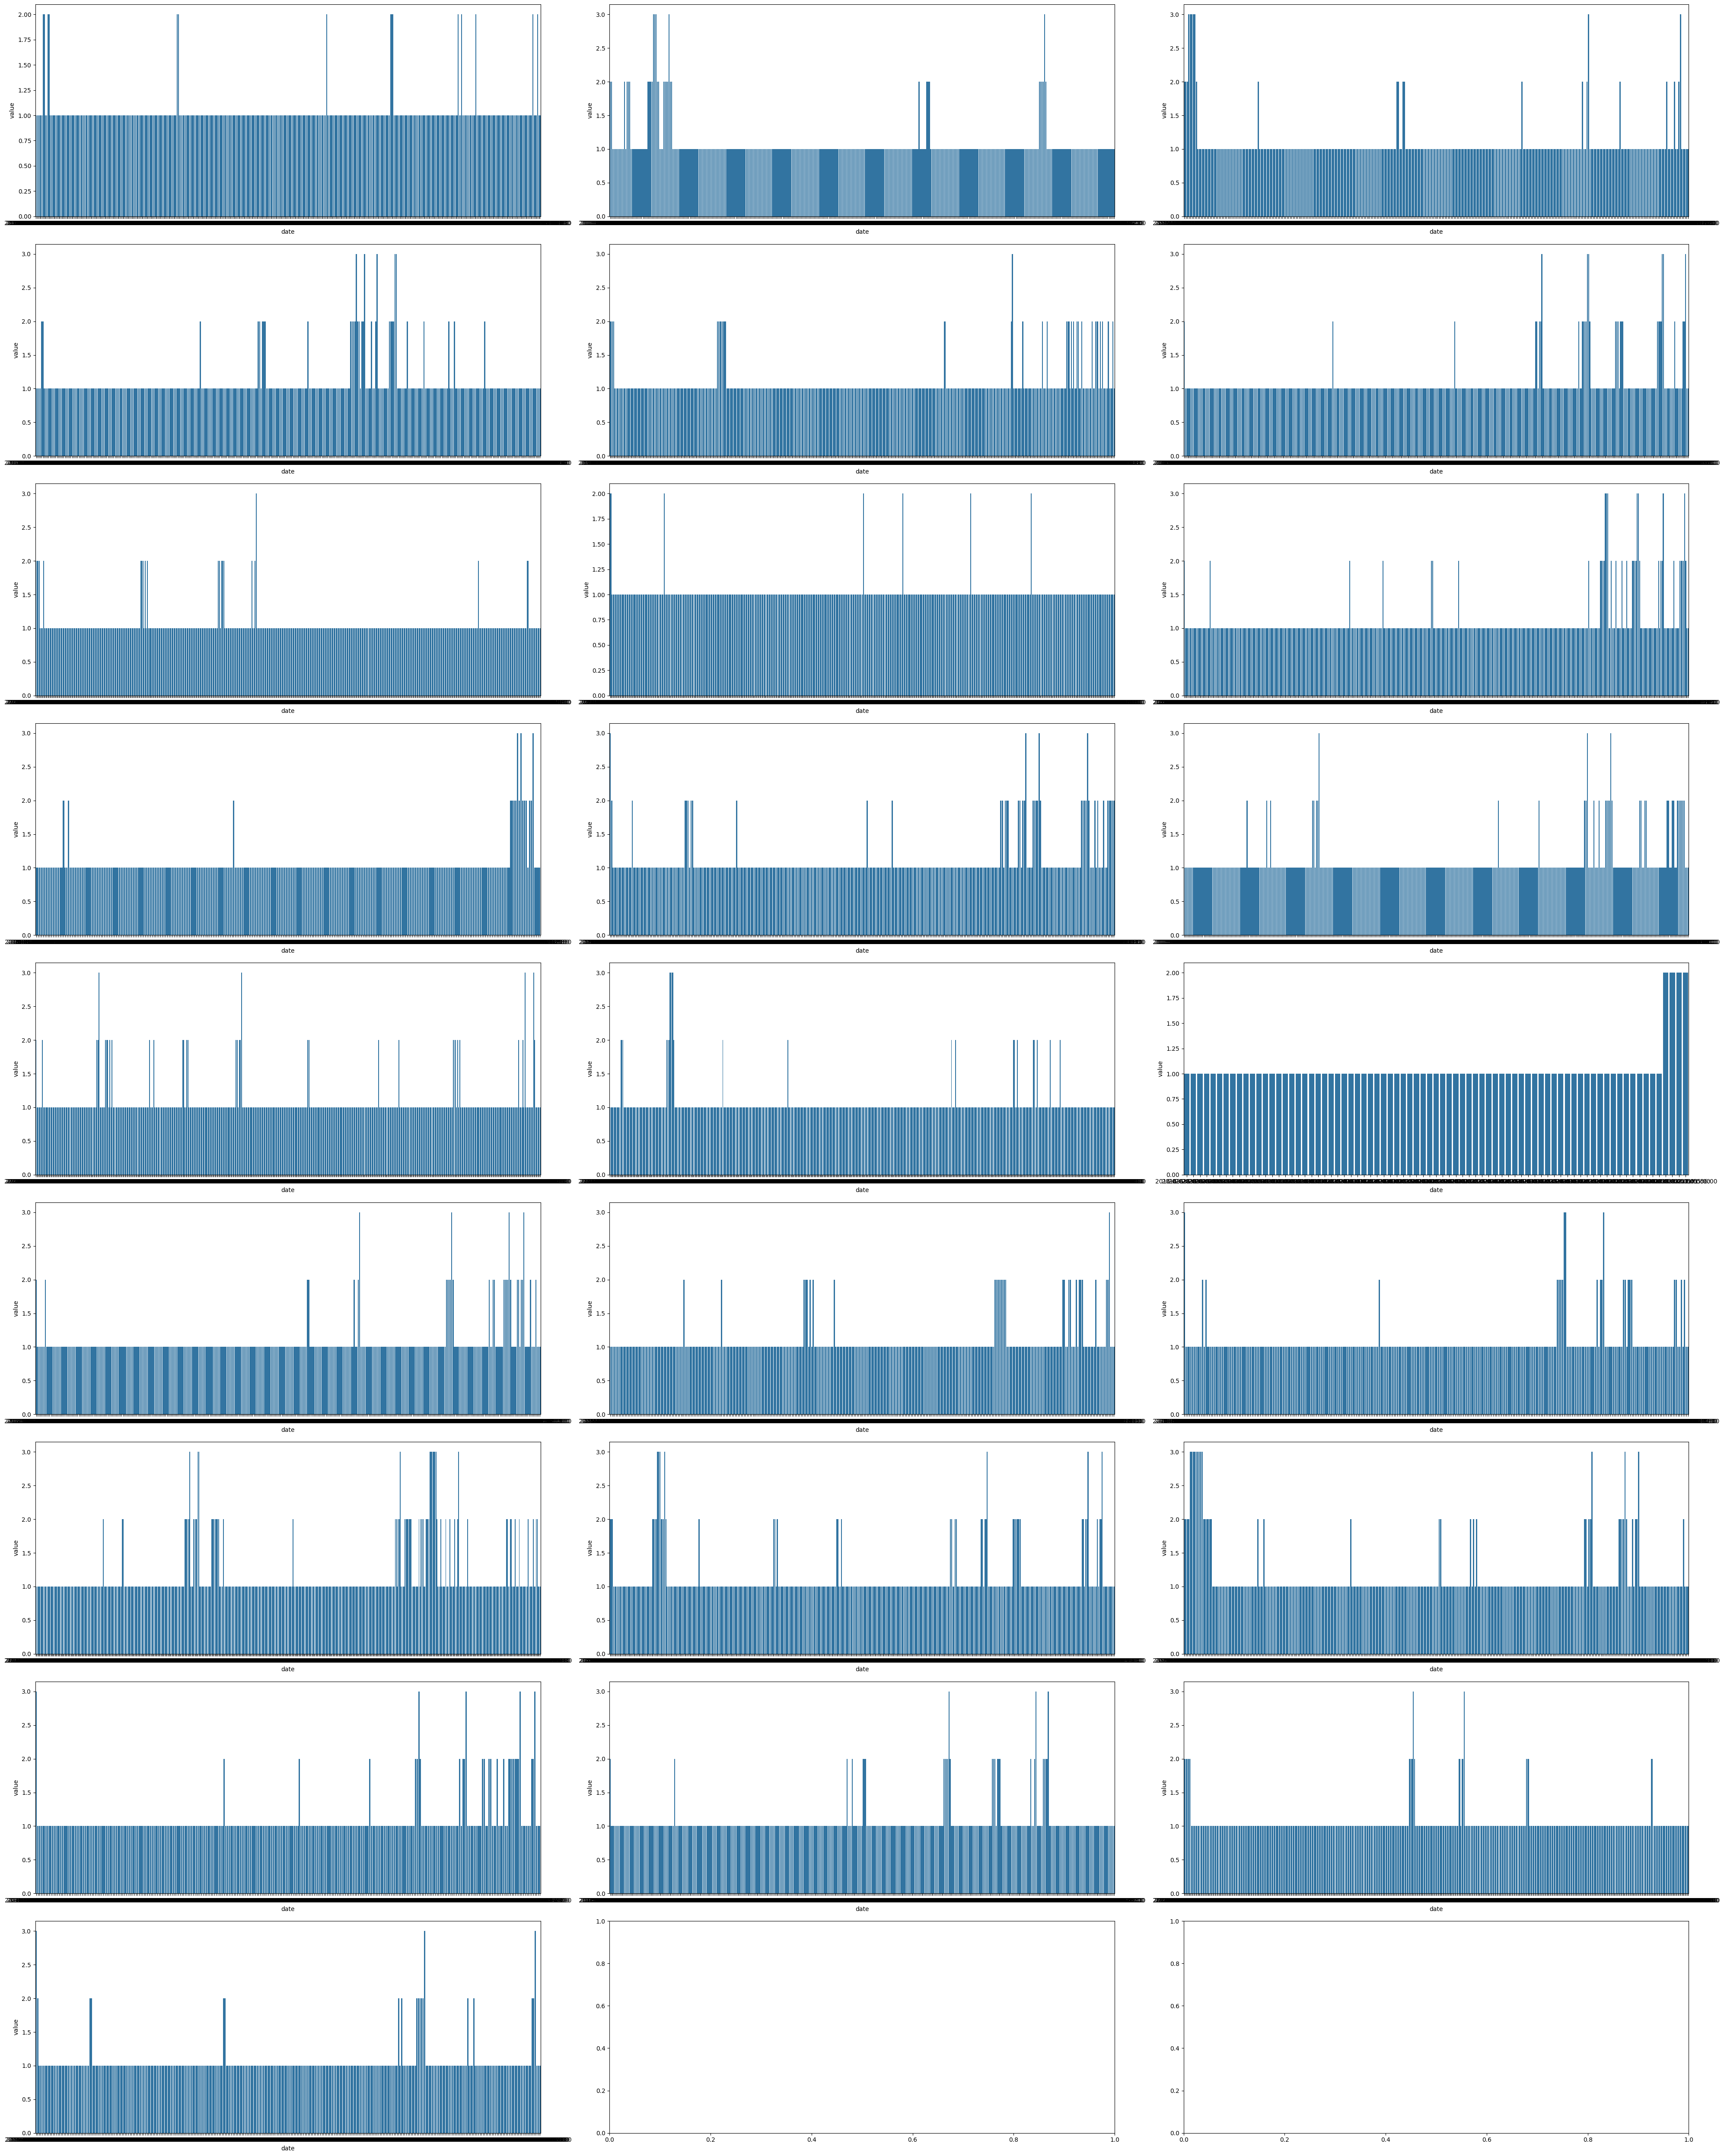

In [ ]:
# Convert 'date' in df_minuteSleep to datetime format
df_minuteSleep['date'] = pd.to_datetime(df_minuteSleep['date'])

#Filtering dataset by id (we just need to see 1 for analysis)
df_filt = df_minuteSleep[df_minuteSleep['Id'] == 1503960366]

# Set the number of rows and columns for the subplots grid
n_cols = 3
# Number of rows is determined as a function of the total number of dates divides by number of columns (+1 to avoid loosing any graphic when applying round() funtion)
n_rows = round(len(df_filt.groupby(df_filt['date'].dt.date))//n_cols) + 1 

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(40, 50))

# Flatten the axes array to make it easier to iterate over
axes = axes.flatten()

# Loop through each 'date' and corresponding filtered data from df_minuteSleep
for idx, (id_specific, df_filtered) in enumerate(df_filt.groupby(df_filt['date'].dt.date)):
    ax = axes[idx]
    
    # Create a barplot of 'date' against 'value'
    sns.barplot(x = 'date', y = 'value', data = df_filtered, ax=ax)

# Adjust the layout to prevent overlap of subplots
plt.tight_layout()

# Show the plot
plt.show()

Based on our exploration of the data, we hypothesize the following meanings for the values in the `minuteSleep_merged.csv` file:

- **1**: Represents light sleep.
- **2**: Represents deep sleep.
- **3**: Represents moments when the person is awake.

For our analysis, we will consider **deep sleep (value 2)** as the most significant indicator of restful sleep. A higher frequency or longer duration spent in value **2** will be treated as a sign of better rest or improved sleep quality. This assumption will guide us in evaluating the relationship between physical activity and sleep quality.

In [274]:
# Convert 'ActivityDate' in df_dailyActivity to datetime format
df_dailyActivity['ActivityDate'] = pd.to_datetime(df_dailyActivity['ActivityDate'])

# Convert 'date' in df_minuteSleep to datetime format
df_minuteSleep['date'] = pd.to_datetime(df_minuteSleep['date'])

# As we wanna try to see the effect of the daily activity of that day to the sleepquality, we have to add an additoinal day to the date column in df_minuteSleep dataset
df_minuteSleep_temp = df_minuteSleep.copy()
df_minuteSleep_temp['date'] = df_minuteSleep_temp['date'] - pd.Timedelta(days=1)

# Group df_minuteSleep_temp by 'Id' and date, to count only the occurrences of value 2 (Deep Sleep)
df_deep_sleep = df_minuteSleep_temp[df_minuteSleep_temp['value'] == 2].groupby(['Id', df_minuteSleep_temp['date'].dt.date]).size().reset_index(name='deep_sleep_count')

# Group df_minuteSleep_temp by 'Id' and date, to count how much time the person is sleeping each day
df_time_in_bed = df_minuteSleep_temp.groupby(['Id', df_minuteSleep_temp['date'].dt.date]).size().reset_index(name='total_time_in_bed')
df_time_sleeping = df_minuteSleep_temp[df_minuteSleep_temp['value'].isin([1, 2])].groupby(['Id', df_minuteSleep_temp['date'].dt.date]).size().reset_index(name='total_time_sleeping')


# Convert the 'date' column to datetime format (for merging purposes)
df_deep_sleep['date'] = pd.to_datetime(df_deep_sleep['date'])
df_time_sleeping['date'] = pd.to_datetime(df_time_sleeping['date'])
df_time_in_bed['date'] = pd.to_datetime(df_time_in_bed['date'])

# Merge all dataframes (df_dailyActivity, df_deep_sleep, df_time_sleeping and df_time_in_bed) on 'Id' and corresponding date columns
df_merged = pd.merge(df_dailyActivity, df_deep_sleep, left_on=['Id', 'ActivityDate'], right_on=['Id', 'date'], how='inner')
df_merged = pd.merge(df_merged, df_time_sleeping, left_on=['Id', 'ActivityDate'], right_on=['Id', 'date'], how='inner')
df_merged = pd.merge(df_merged, df_time_in_bed, left_on=['Id', 'ActivityDate'], right_on=['Id', 'date'], how='inner')

# Drop the 'date' column from the merged dataframe as it's no longer needed
df_merged.drop(columns=['date_x', 'date_y', 'date'], inplace=True)

# Display the first few rows of the merged dataframe
df_merged.head()

/var/folders/7g/p7l3dxxd09g48svxxrg3b4880000gn/T/ipykernel_42695/2334917261.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_minuteSleep['date'] = pd.to_datetime(df_minuteSleep['date'])


Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366   2016-03-25       11004           7.11             7.11   
1  1503960366   2016-03-26       17609          11.55            11.55   
2  1503960366   2016-03-27       12736           8.53             8.53   
3  1503960366   2016-03-28       13231           8.93             8.93   
4  1503960366   2016-03-30       10970           7.16             7.16   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                2.57                      0.46   
1                       0.0                6.92                      0.73   
2                       0.0                4.66                      0.16   
3                       0.0                3.19                      0.79   
4                       0.0                2.36                      0.51   

   LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0                 4.07                      0.0                 33   
1                 3.91                      0.0                 89   
2                 3.71                      0.0                 56   
3                 4.95                      0.0                 39   
4                 4.29                      0.0                 30   

   FairlyActiveMinutes  LightlyActiveMinutes  SedentaryMinutes  Calories  \
0                   12                   205               804      1819   
1                   17                   274               588      2154   
2                    5                   268               605      1944   
3                   20                   224              1080      1932   
4                   13                   223              1174      1820   

   deep_sleep_count  total_time_sleeping  total_time_in_bed  
0                31                  468                472  
1                19                  502                506  
2                 4                   77                 77  
3                25                  374                378  
4                27                  335                336

In [272]:
df_merged.shape

(179, 21)

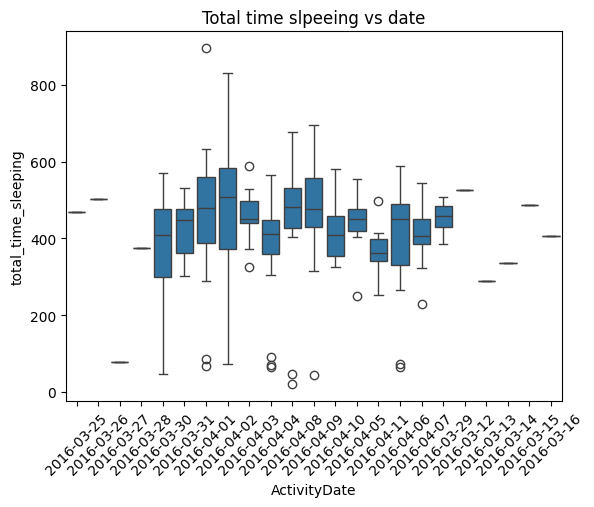

In [280]:
sns.boxplot(x='ActivityDate', y='total_time_sleeping', data = df_merged)
plt.title('Total time slpeeing vs date')
plt.xticks(rotation=45)
plt.show()

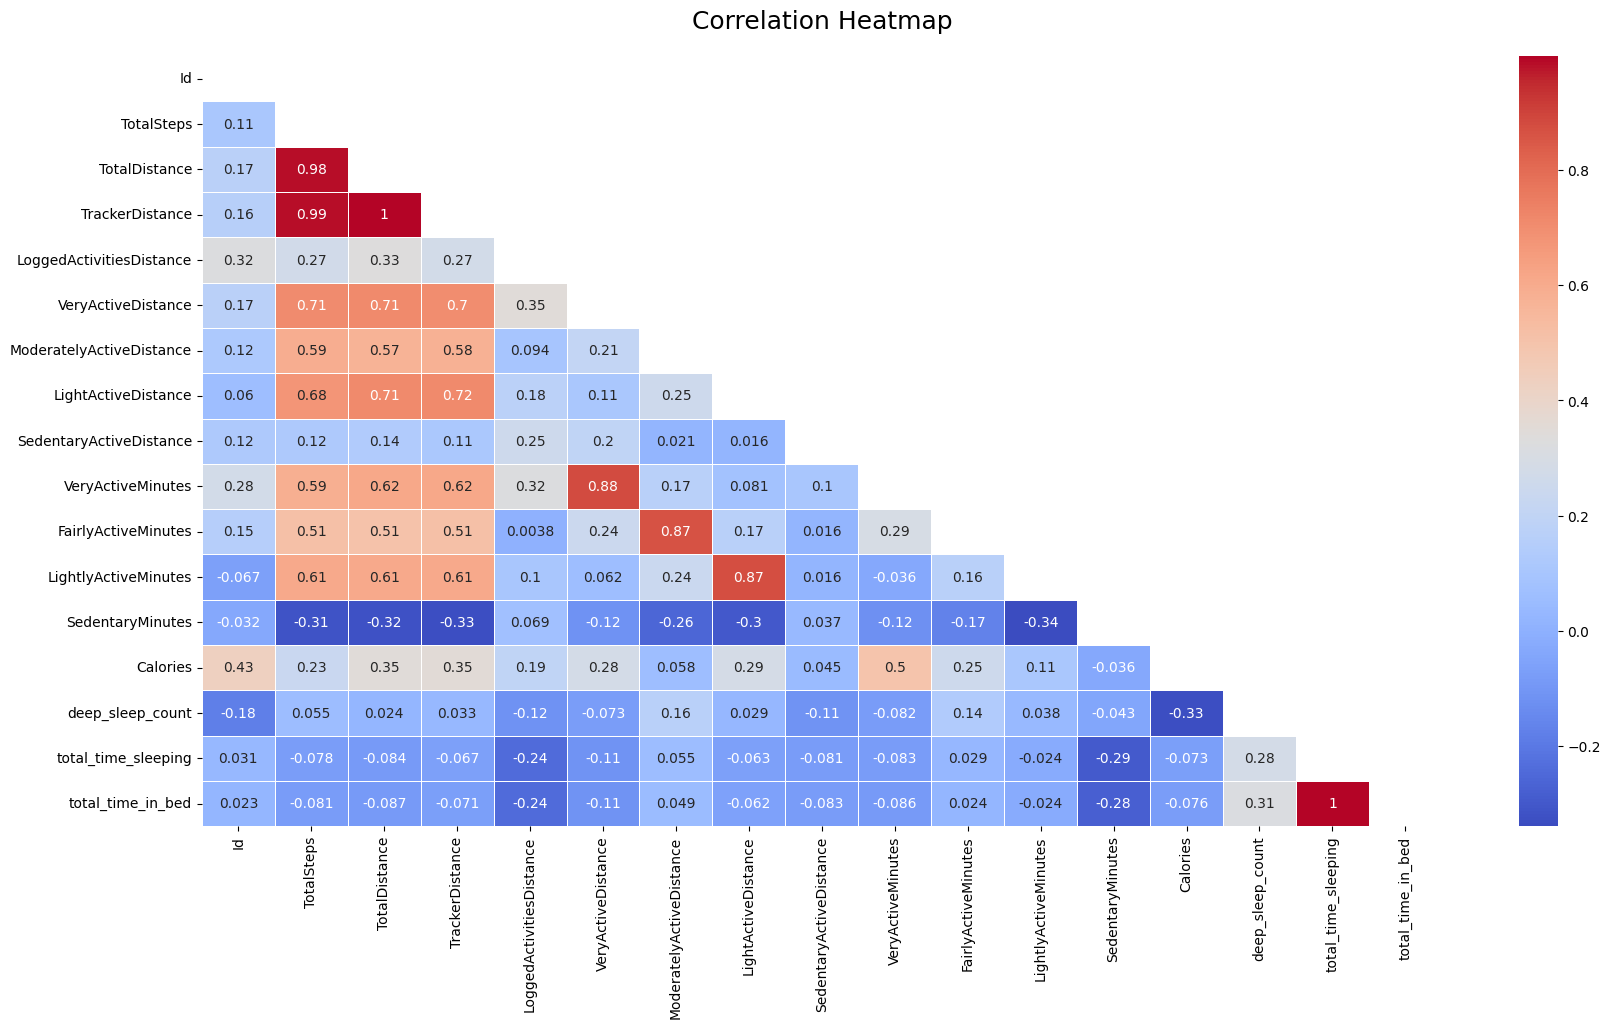

In [282]:
corr = df_merged.drop(columns=['ActivityDate']).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(20,10))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=18, pad=20)
plt.show()

/var/folders/7g/p7l3dxxd09g48svxxrg3b4880000gn/T/ipykernel_42695/3253357328.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/var/folders/7g/p7l3dxxd09g48svxxrg3b4880000gn/T/ipykernel_42695/3253357328.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/var/folders/7g/p7l3dxxd09g48svxxrg3b4880000gn/T/ipykernel_42695/3253357328.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
/var/folders/7g/p7l3dxxd09g48svxxrg3b4880000gn/T/ipykernel_42695/3253357328.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a Fi

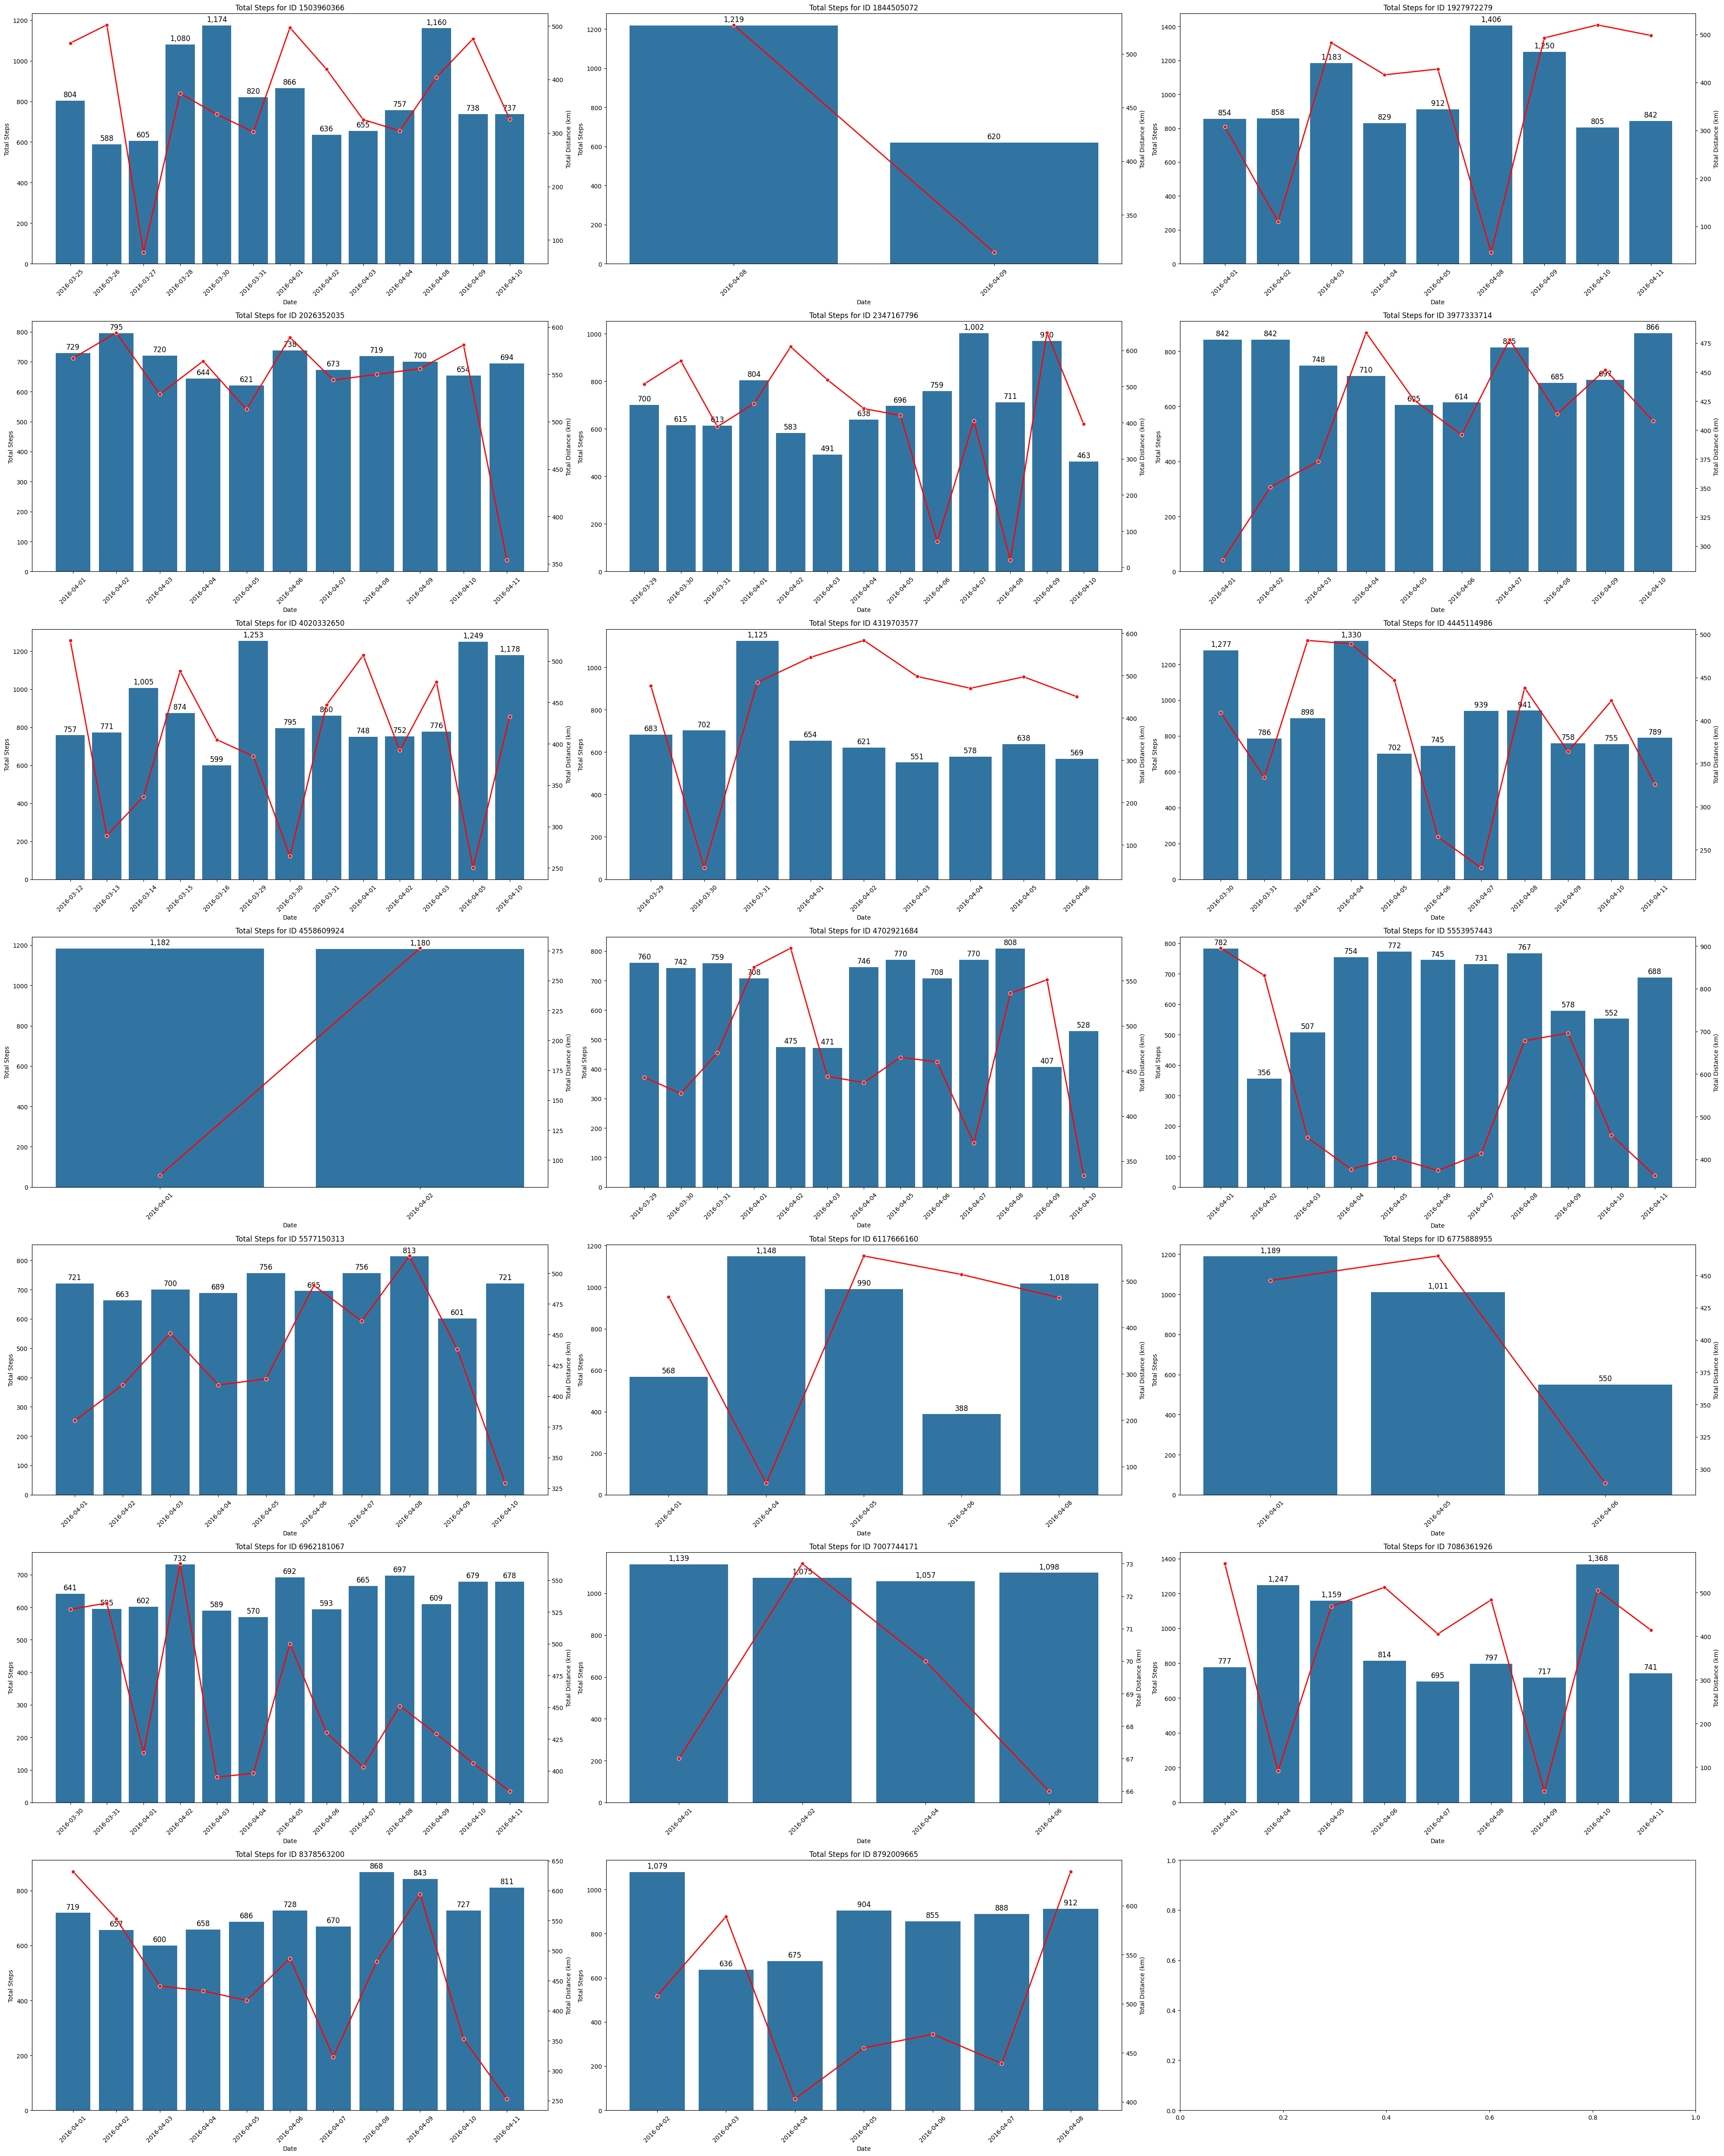

In [278]:
# Convert 'ActivityDate' in df_merged to datetime format, remove timezone info
df_merged['ActivityDate'] = pd.to_datetime(df_merged['ActivityDate']).dt.tz_localize(None)

# Convert 'ActivityDate' column to string format for plotting
df_merged['ActivityDate'] = df_merged['ActivityDate'].astype(str)

# Set the number of rows and columns for the subplots grid
n_rows = 7  
n_cols = 3  

# Create a figure with subplots (12 rows, 3 columns) with a large size
fig, axes = plt.subplots(n_rows, n_cols, figsize=(40, 50))

# Flatten the axes array to make it easier to iterate over
axes = axes.flatten()

# Loop through each 'Id' and corresponding filtered data from df_merged
for idx, (id_specific, df_filtered) in enumerate(df_merged.groupby('Id')):
    ax = axes[idx]  # Select the subplot for this ID
    
    # Create a barplot of 'TotalSteps' against 'ActivityDate'
    sns.barplot(x='ActivityDate', y='SedentaryMinutes', data=df_filtered, ax=ax)
    
    # Annotate the bars with their respective heights (total steps)
    for p in ax.patches:
        ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), textcoords='offset points')
    
    # Create a second y-axis for the line plot (TotalDistance)
    ax2 = ax.twinx()
    
    # Create a lineplot of 'TotalDistance' against 'ActivityDate' with a red color
    sns.lineplot(x='ActivityDate', y='total_time_sleeping', data=df_filtered, ax=ax2, color='red', marker='o', linewidth=2)

    # Set the title of the subplot
    ax.set_title(f'Total Steps for ID {id_specific}')
    
    # Set labels for the x and y axes
    ax.set_xlabel('Date')
    ax.set_ylabel('Total Steps')
    
    # Set label for the secondary y-axis (Total Distance)
    ax2.set_ylabel('Total Distance (km)')
    
    # Rotate the x-axis labels for better readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Adjust the layout to prevent overlap of subplots
plt.tight_layout()

# Show the plot
plt.show()

In [22]:
df_merged.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
value                         int64
dtype: object